In [6]:
from qutip import *
import numpy as np
import sys
import importlib

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 18,
    "font.size": 18,
    "legend.fontsize": 14,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rcParams.update(params)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [8]:
def import_npz(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName] = Data[varName]

fname = ['w_d=1.1_w_d_disp=1.1', 'w_d=1.15_w_d_disp=1.1', 'w_d=1.5_w_d_disp=1.1']

w_list = []
exp_a = []
exp_a_an = []
exp_a_disp = []
exp_a_disp_an = []
g_parallel_a = []

for j in range(3):
    data = np.load('../../data/charge_qubit/single_case/A_q=0.05_'+fname[j]+'_N_fock=15_N_rep=15_n_states=2_dim=2_compensation=False_dispersive=True.npz')
    w_list.append(data['w'])
    exp_a.append(data['exp_a'])
    exp_a_an.append(data['exp_a_an'])
    exp_a_disp.append(data['exp_a_disp'])
    exp_a_disp_an.append(data['exp_a_disp_an'])
    
    kappa = data['kappa']

    g_parallel_a.append(data['g_parallel']*2/kappa)
    tlist = data['tlist']
    qubit_state_list = data['qubit_state_list']
    g = data['g']
    wq = data['wq']

final_t = 0.5

import_npz('../../data/charge_qubit/SNR_N_fock=6_N_rep_import=40_n_states=2_dim=2_num_w=151_final_t='+str(final_t)+'_compensation=False.npz')
import_npz('../../data/charge_qubit/floquet_spectrum/w_r=0.42_N_rep=20_n_states=2_dim=2.npz')
import_npz('../../data/charge_qubit/SNR_cut_N_fock=10_N_rep=40_num_w=151_final_t='+str(final_t)+'.npz')
import_npz('../../data/charge_qubit/g_parallel/N_rep=40_n_states=2_dim=2_num_w=151.npz')

/tmp/ipykernel_40067/1243442981.py:162: RuntimeWarning: divide by zero encountered in divide
  ax_eq.plot(wlist, np.abs(g_parallel[:,idx]/(g*A*wq*np.ones(len(wlist))/((wq*np.ones(len(wlist)))**2-wlist**2))), color=colors_plot[idx], lw=3)
/tmp/ipykernel_40067/1243442981.py:239: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_40067/1243442981.py:239: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


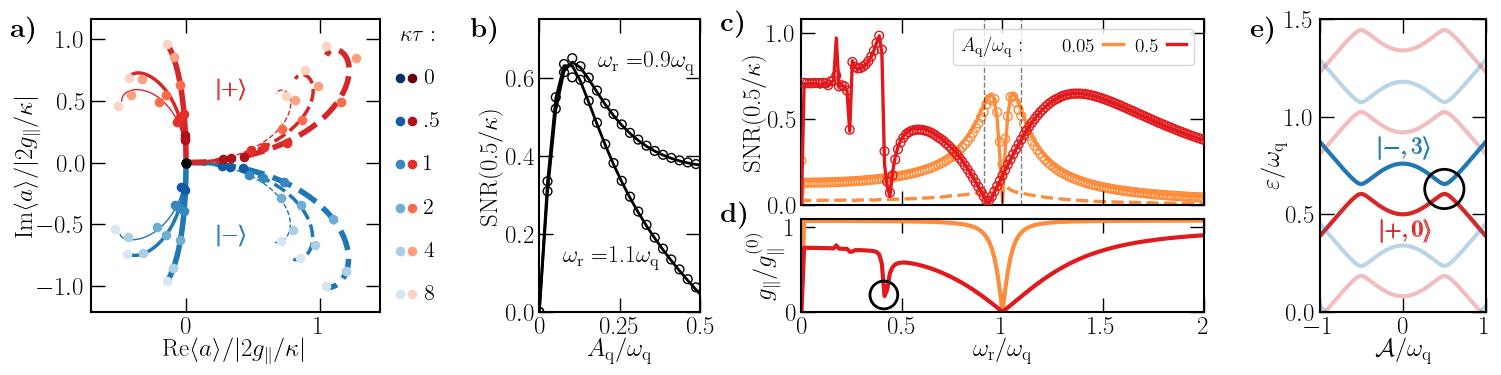

In [9]:
# import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec

index_wr_list = [index_wr_low, index_wr_high]

%matplotlib inline

cmap_plot = plt.get_cmap('YlOrRd')
norm = plt.Normalize(-2,2)
colors_plot = cmap_plot(norm([i for i in range(len(Alist))]))

props = dict(boxstyle='round', facecolor='#b8b8b8a6', alpha=0.8)

fig = plt.figure(figsize=(18,3.8), layout="constrained")

gs0 = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[0.5, 1, 0.25], wspace=0.3)

gs00 = gs0[0].subgridspec(1, 2, wspace=0, width_ratios=[1, 0.15])

ax1 = fig.add_subplot(gs00[0])
ax = [ax1]

gs01 = gs0[1].subgridspec(2, 2, wspace=0.36, hspace=0.1, width_ratios=[0.4, 1], height_ratios=[1, 0.5])

ax_cut = fig.add_subplot(gs01[0:,0])
ax_SNR = fig.add_subplot(gs01[0,1])
ax_eq = fig.add_subplot(gs01[1,1], sharex=ax_SNR)

gs02 = gs0[2].subgridspec(1, 1)

ax_replica = fig.add_subplot(gs02[0])

###################### First column #################################
x_list = [0,0.5,1,2,4,8]

norm = mpl.colors.Normalize(vmin=0, vmax=len(x_list))

cmap_b = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Blues'].reversed())
cmap_b.set_array([])

cmap_r = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Reds'].reversed())
cmap_r.set_array([])

cmap = [cmap_b, cmap_r]

dictionary = {}

for index_w,w in enumerate(w_list):

    for q_idx,qubit_state in enumerate(qubit_state_list):

        if qubit_state == 0:
            p1, = ax[0].plot(exp_a_an[index_w][0].real/np.abs(g_parallel_a[index_w]), exp_a_an[index_w][0].imag/np.abs(g_parallel_a[index_w]), 'tab:blue', zorder = 0, lw = 1+1.5*(index_w))
            q1, = ax[0].plot(exp_a_disp_an[index_w][0].real/np.abs(g_parallel_a[index_w]), exp_a_disp_an[index_w][0].imag/np.abs(g_parallel_a[index_w]), ls='--', c='tab:blue', zorder = 0, lw = 1+1.5*(index_w))
        else:
            p3, = ax[0].plot(exp_a_an[index_w][1].real/np.abs(g_parallel_a[index_w]), exp_a_an[index_w][1].imag/np.abs(g_parallel_a[index_w]), 'tab:red', zorder = 0, lw = 1+1.5*(index_w))
            q3, = ax[0].plot(exp_a_disp_an[index_w][1].real/np.abs(g_parallel_a[index_w]), exp_a_disp_an[index_w][1].imag/np.abs(g_parallel_a[index_w]), ls='--', c='tab:red', zorder = 0, lw = 1+1.5*(index_w))
                            
        for index,i in enumerate(x_list):
            idx = np.where(np.abs(tlist*kappa-i)<0.01)[0][0]
            
            if q_idx == 0:
                point_blue = ax[0].scatter(exp_a[index_w][q_idx][idx].real/np.abs(g_parallel_a[index_w]), exp_a[index_w][q_idx][idx].imag/np.abs(g_parallel_a[index_w]), color=cmap[q_idx].to_rgba(index), s=35, zorder=1)
                dictionary[f'point_blue_{index}'] = point_blue
            else:
                point_red = ax[0].scatter(exp_a[index_w][q_idx][idx].real/np.abs(g_parallel_a[index_w]), exp_a[index_w][q_idx][idx].imag/np.abs(g_parallel_a[index_w]), color=cmap[q_idx].to_rgba(index), s=35, zorder=1)
                dictionary[f'point_red_{index}'] = point_red

            q8 = ax[0].scatter(exp_a_disp[index_w][q_idx][idx].real/np.abs(g_parallel_a[index_w]), exp_a_disp[index_w][q_idx][idx].imag/np.abs(g_parallel_a[index_w]), color=cmap[q_idx].to_rgba(index), s=35, zorder=1)
        
ax[0].text(0.55,0.3,r'$\pmb{\left\vert - \right\rangle}$', ha='right', va='top', transform=ax[0].transAxes, color = 'tab:blue', size=16)
ax[0].text(0.55,0.8,r'$\pmb{\left\vert + \right\rangle}$', ha='right', va='top', transform=ax[0].transAxes, color = 'tab:red', size=16)

ax[0].set_xmargin(0.1)
ax[0].set_ymargin(0.1)

ax[0].xaxis.set_tick_params(direction="in", which='both')
ax[0].yaxis.set_tick_params(direction="in", which='both')

ax[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax[0].set_ylabel(r'$\text{Im} \langle a \rangle/\vert 2g_\parallel/\kappa \vert$', labelpad=-3)
ax[0].set_xlabel(r'$\text{Re} \langle a \rangle/\vert 2g_\parallel/\kappa \vert$', labelpad=-1)

p1, = ax[0].plot(0,0, c='black', alpha=1)
q1, = ax[0].plot(0,0, c='black', ls='--', alpha=1)
q4 = ax[0].scatter(0,0, c='black')

#####  Second column  #####
cmap = mpl.colormaps["tab10"]  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

for ii,current_replica in enumerate(N_replicas):
    if current_replica == 0:
        ax_replica.plot(A_list_replica, evals_list[ii][:,0], c=colors[0], lw=3, alpha=0.3)
        ax_replica.plot(A_list_replica, evals_list[ii][:,1], c=colors[3], lw=3)
    elif current_replica == 3:
        ax_replica.plot(A_list_replica, evals_list[ii][:,0], c=colors[0], lw=3)
        ax_replica.plot(A_list_replica, evals_list[ii][:,1], c=colors[3], lw=3, alpha=0.3)
    else:
        ax_replica.plot(A_list_replica, evals_list[ii][:,0], c=colors[0], lw=3, alpha=0.3)
        ax_replica.plot(A_list_replica, evals_list[ii][:,1], c=colors[3], lw=3, alpha=0.3)

ax_replica.text(0.69, 0.255, r'$\pmb{\left\vert +,0 \right\rangle}$', ha='right', \
               transform=ax_replica.transAxes, c='tab:red', fontsize=17)
ax_replica.text(0.69, 0.54, r'$\pmb{\left\vert -,3 \right\rangle}$', ha='right', \
               transform=ax_replica.transAxes, c='tab:blue', fontsize=17)

ax_replica.xaxis.set_tick_params(direction="in", which='both')
ax_replica.yaxis.set_tick_params(direction="in", which='both')
ax_replica.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_replica.set_xlabel(r'$\mathcal{A}/\omega_{\rm q}$', labelpad=-1)
ax_replica.set_ylabel(r'$\varepsilon/\omega_{\rm q}$', labelpad=-1)

ax_replica.set_xlim([-1,1])
ax_replica.set_ylim([0,1.5])

ax_replica.scatter(0.5, 0.63, s=800, facecolors='none', edgecolors='black', lw=2, zorder=100, clip_on=False)

##################### Third column ########################################
for idx,A in enumerate(Alist):
    if idx == 0:
        p1, = ax_SNR.plot(wlist, np.real(res_an[idx,:]), label=str(A), zorder=idx*10, color=colors_plot[idx], lw=2.4)   
        ax_SNR.scatter(wlist, np.real(res_num[idx,:]), marker='o', color=colors_plot[idx], facecolors='none', s=40)
        q1, = ax_SNR.plot(wlist, np.real(res_num_disp[idx,:]), color=colors_plot[idx], lw=2.4, ls='--', zorder=-100)    

    if idx == 1:
        p1, = ax_SNR.plot(wlist, np.real(res_an[idx,:]), label=str(A), zorder=idx*10, color=colors_plot[idx], lw=2.4)   
        ax_SNR.scatter(wlist, np.real(res_num[idx,:]), marker='o', color=colors_plot[idx], facecolors='none', s=40, zorder=100)

if final_t == 0.2:
    ax_SNR.set_ylim([0,0.28])
if final_t == 0.5:
    ax_SNR.set_ylim([0,1.08])

ax_SNR.xaxis.set_tick_params(direction="in", which='both')
ax_SNR.yaxis.set_tick_params(direction="in", which='both')

ax_SNR.set_ylabel(r'SNR$($'+str(final_t)+r'$/\kappa)$', labelpad=1)
ax_SNR.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=False, labelright=False, labeltop=False, which='both')

ax_SNR.axvline(x=wlist[index_wr_list[0]], c='black', ls='--', lw=1, alpha=0.5)
ax_SNR.axvline(x=wlist[index_wr_list[1]], c='black', ls='--', lw=1, alpha=0.5)

h, l = ax_SNR.get_legend_handles_labels() # Extracting handles and labels
ph = [plt.plot([],marker="", ls="")[0]] # Canvas
handles = ph + h
labels = [r'$A_{\text{q}}/\omega_{\text{q}}:$'] + l  # Merging labels
leg = ax_SNR.legend(handles, labels, fontsize="14", columnspacing=0.6, handletextpad=0.4, labelspacing = 0.05, ncol=4, markerfirst=False, \
                 handlelength=1, loc='upper right')

##################### Third column ########################################
for idx,A in enumerate(Alist):
    if idx == 0 or idx == 1:
        ax_eq.plot(wlist, np.abs(g_parallel[:,idx]/(g*A*wq*np.ones(len(wlist))/((wq*np.ones(len(wlist)))**2-wlist**2))), color=colors_plot[idx], lw=3)    

ax_eq.set_ylim([0,1.1])

ax_eq.xaxis.set_tick_params(direction="in", which='both')
ax_eq.yaxis.set_tick_params(direction="in", which='both')
ax_eq.set_xlabel(r'$\omega_{\text{r}}/\omega_{\text{q}}$', labelpad=-1)
ax_eq.set_ylabel(r'$g_\parallel/g_\parallel^{(0)}$')

ax_eq.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_eq.yaxis.set_label_coords(-0.04,0.48)

ax_eq.set_xticks([0,0.5,1,1.5,2], ['0','0.5','1','1.5','2'])

ax_eq.scatter(0.41, 0.2, s=400, facecolors='none', edgecolors='black', lw=2, zorder=100, clip_on=False)

##################### Fourth column ########################################
res_an_cut_SNR[:,0][0]=0
res_an_cut_SNR[:,1][0]=0

ax_cut.plot(Alist_cut_SNR, res_an_cut_SNR[:,0], c='black', lw=2)
ax_cut.scatter(Alist_cut_SNR, res_num_cut_SNR[:,0], marker='o', color='black', facecolors='none', s=40)

ax_cut.plot(Alist_cut_SNR, res_an_cut_SNR[:,1], c='black', lw=2)
ax_cut.scatter(Alist_cut_SNR, res_num_cut_SNR[:,1], marker='o', color='black', facecolors='none', s=40)

ax_cut.xaxis.set_tick_params(direction="in", which='both')
ax_cut.yaxis.set_tick_params(direction="in", which='both')

ax_cut.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_cut.set_xlabel(r'$A_{\rm q}/\omega_{\rm q}$', labelpad=-1)
ax_cut.set_ylabel(r'SNR$($'+str(final_t)+r'$/\kappa)$', labelpad=1)

ax_cut.set_xlim([0,0.5])

ax_cut.text(0.96,0.887,r'$\omega_{\rm r}=$'+str(np.round(wlist[index_wr_list[0]],1))+r'$\omega_{\rm q}$', ha='right', va='top', transform=ax_cut.transAxes, color = 'black', \
        fontsize=17)
ax_cut.text(0.74,0.22,r'$\omega_{\rm r}=$'+str(np.round(wlist[index_wr_list[1]],1))+r'$\omega_{\rm q}$', ha='right', va='top', transform=ax_cut.transAxes, color = 'black', \
        fontsize=17)

ax_cut.set_xticks([0,0.25,0.5], ['0','0.25','0.5'])

if final_t == 0.2:
    ax_cut.set_yticks([0,0.1,0.2])
    ax_cut.set_ylim([0,0.21])
if final_t == 0.5:
    ax_cut.set_yticks([0,0.2,0.4,0.6])
    ax_cut.set_ylim([0,0.751])

#### Labels ####
labels = ['a)', 'b)', 'c)', 'd)','e)']
ax[0].text(-0.28, 0.94, r'\bf{'+labels[0]+'}', size=20, color='black', transform=ax[0].transAxes)
ax_cut.text(-0.43, 0.94, r'\bf{'+labels[1]+'}', size=20, color='black', transform=ax_cut.transAxes)
ax_SNR.text(-0.2, 0.94, r'\bf{'+labels[2]+'}', size=20, color='black', transform=ax_SNR.transAxes)
ax_eq.text(-0.2, 0.97, r'\bf{'+labels[3]+'}', size=20, color='black', transform=ax_eq.transAxes)
ax_replica.text(-0.42, 0.94, r'\bf{'+labels[4]+'}', size=20, color='black', transform=ax_replica.transAxes)

##### Fig legend ######
legend_list = []
legend_list_name = []
for iindex, ii in enumerate(x_list):
    legend_list.append((dictionary[f'point_blue_{iindex}'], dictionary[f'point_red_{iindex}']))
    if iindex == 1:
        legend_list_name.append('.5')
    else:
        legend_list_name.append(f'{ii}')

leg = fig.legend(legend_list, legend_list_name, handler_map={tuple: HandlerTuple(ndivide=None)}, \
           bbox_to_anchor=(0.329, 0.91), handlelength=0.8, fontsize=16, handletextpad=0.4, labelspacing = 1.05, borderpad=0.28)
leg.set_title(r'$\kappa\tau:$')   
leg.get_title().set_fontsize('16')
leg.get_frame().set_linewidth(0.0)

plt.tight_layout()

fig.savefig('../figures/fig2_'+str(final_t)+'.pdf', bbox_inches='tight')

In [10]:
import_npz('../../data/charge_qubit/g_parallel/N_rep=40_n_states=2_dim=2_num_w=151.npz')

g_parallel[idx,:]

array([0.00053876+0.j, 0.0037959 +0.j, 0.00637643+0.j])